<a href="https://www.kaggle.com/code/rishukumargupta/sleep-disorder?scriptVersionId=135436171" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

In [3]:
df.shape

(374, 13)

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [5]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [6]:
df=df.drop(columns="Person ID")

In [7]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [8]:
df.sample(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
172,Male,41,Lawyer,7.7,8,90,5,Normal,130/85,70,8000,None
208,Male,43,Engineer,7.7,8,90,5,Normal,130/85,70,8000,None
72,Male,33,Doctor,6.1,6,30,8,Normal,125/80,72,5000,None
190,Female,43,Teacher,6.7,7,45,4,Overweight,135/90,65,6000,Insomnia
61,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,None


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0
Sleep Duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.8,8.5
Quality of Sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.0,9.0
Physical Activity Level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.0,90.0
Stress Level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.0,8.0
Heart Rate,374.0,70.165775,4.135676,65.0,68.00,70.0,72.0,86.0
Daily Steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.0,10000.0


# **Data Preparation**
1. Data Cleaning
2. Data Exporation
3. Data Splitting 
4. Training with Differents Model
5. Improve them 

## **1. Data Cleaning**

In [11]:
df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [12]:
df['Sleep Disorder'].unique()

array(['None', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [13]:
df['Sleep Disorder']=df['Sleep Disorder'].str.replace('None','Presence')
df['Sleep Disorder']=df['Sleep Disorder'].str.replace('Sleep Apnea','Absence')
df['Sleep Disorder']=df['Sleep Disorder'].str.replace('Insomnia','Absence')

In [14]:
df['Sleep Disorder'].unique()

array(['Presence', 'Absence'], dtype=object)

In [15]:
df['Blood Pressure outof 120']=df['Blood Pressure'].apply(lambda x: float(x.split('/')[1]))

In [16]:
df['Blood Pressure outof 180']=df['Blood Pressure'].apply(lambda x: float(x.split('/')[1]))

In [17]:
df=df.drop(columns='Blood Pressure outof 120')
df=df.drop(columns='Blood Pressure')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Gender                    374 non-null    object 
 1   Age                       374 non-null    int64  
 2   Occupation                374 non-null    object 
 3   Sleep Duration            374 non-null    float64
 4   Quality of Sleep          374 non-null    int64  
 5   Physical Activity Level   374 non-null    int64  
 6   Stress Level              374 non-null    int64  
 7   BMI Category              374 non-null    object 
 8   Heart Rate                374 non-null    int64  
 9   Daily Steps               374 non-null    int64  
 10  Sleep Disorder            374 non-null    object 
 11  Blood Pressure outof 180  374 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 35.2+ KB


## **2. Data Exporation**

In [19]:
##importing the required library
import matplotlib.pyplot as plt
import seaborn as sns 

In [20]:
num_var=[]
cat_var=[]

##for numerical var
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype =='float64':
        num_var.append(i)
    
##for categorial var
for i in df.columns:
    if df[i].dtype == 'object':
        cat_var.append(i)

In [21]:
print("Numerical variable ",num_var)
print("Categorial variable ",cat_var)

Numerical variable  ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Blood Pressure outof 180']
Categorial variable  ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']


<Axes: >

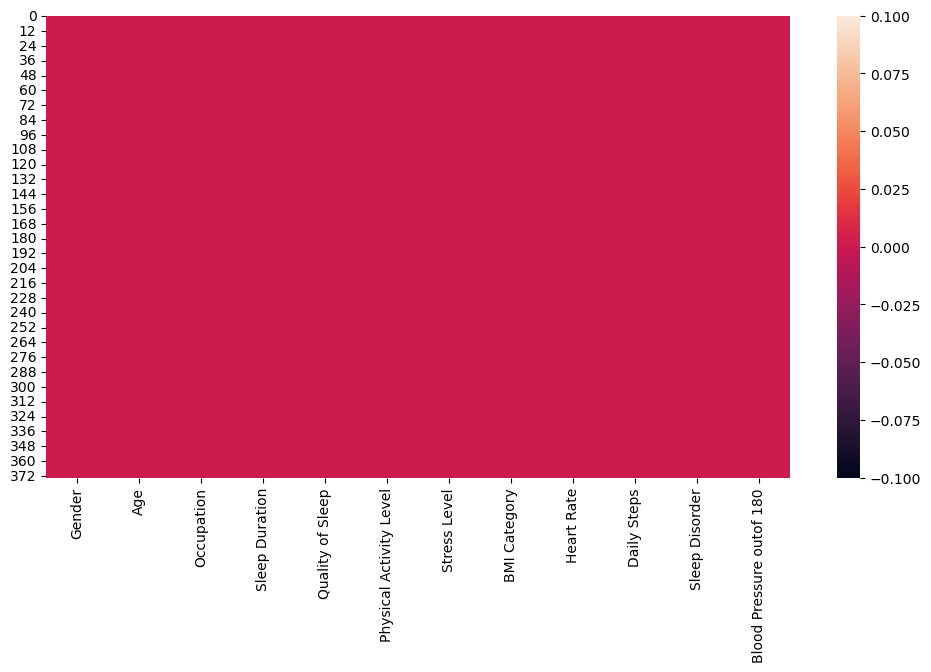

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

<Axes: >

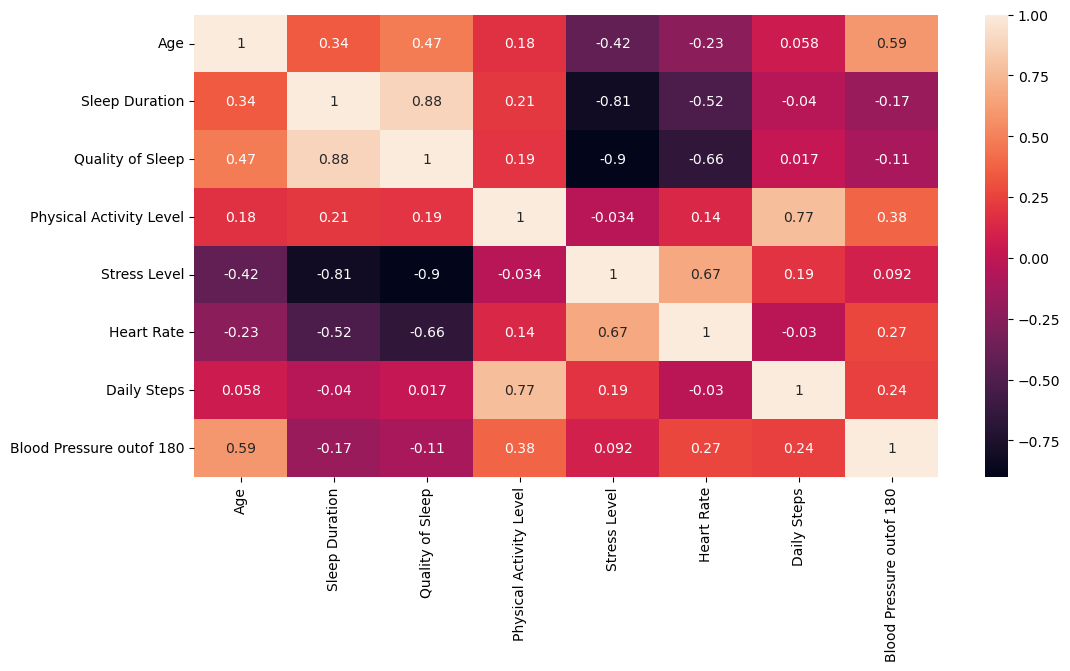

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df[num_var].corr(),annot=True)

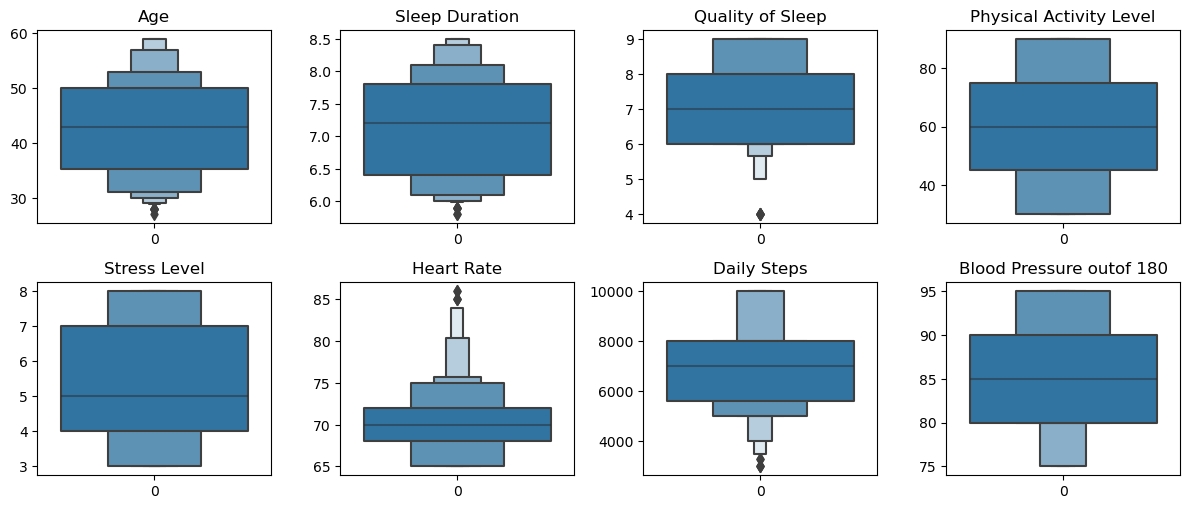

In [24]:
plt.figure(figsize=(12,10))
for i,var in enumerate(df[num_var]):
    plt.subplot(4,4,i+1)
    sns.boxenplot(df[var])
    plt.title(var)
    
plt.tight_layout()
plt.show()

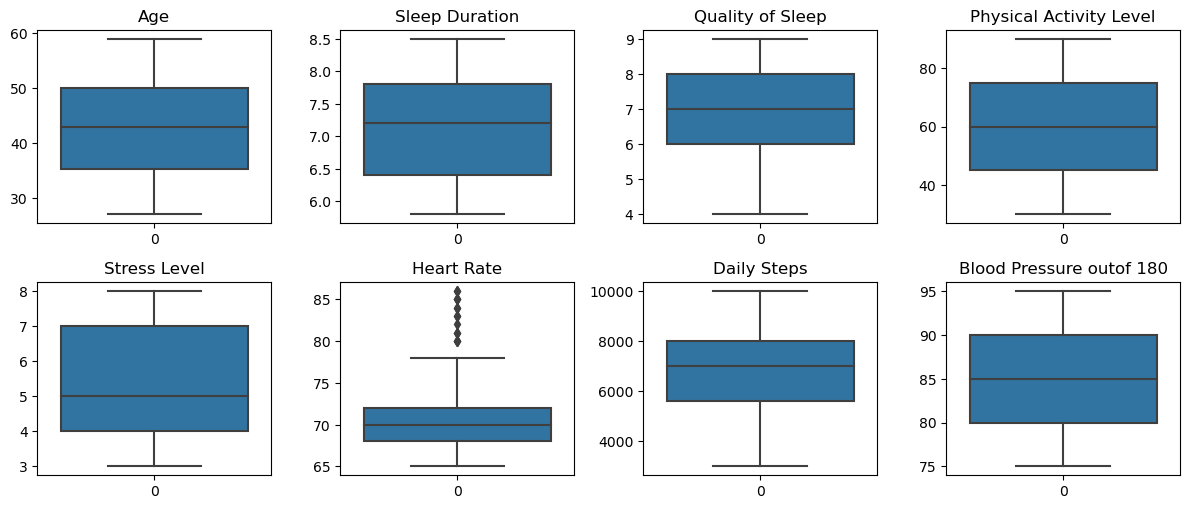

In [25]:
plt.figure(figsize=(12,10))
for i,var in enumerate(df[num_var]):
    plt.subplot(4,4,i+1)
    sns.boxplot(df[var])
    plt.title(var)
    
plt.tight_layout()
plt.show()

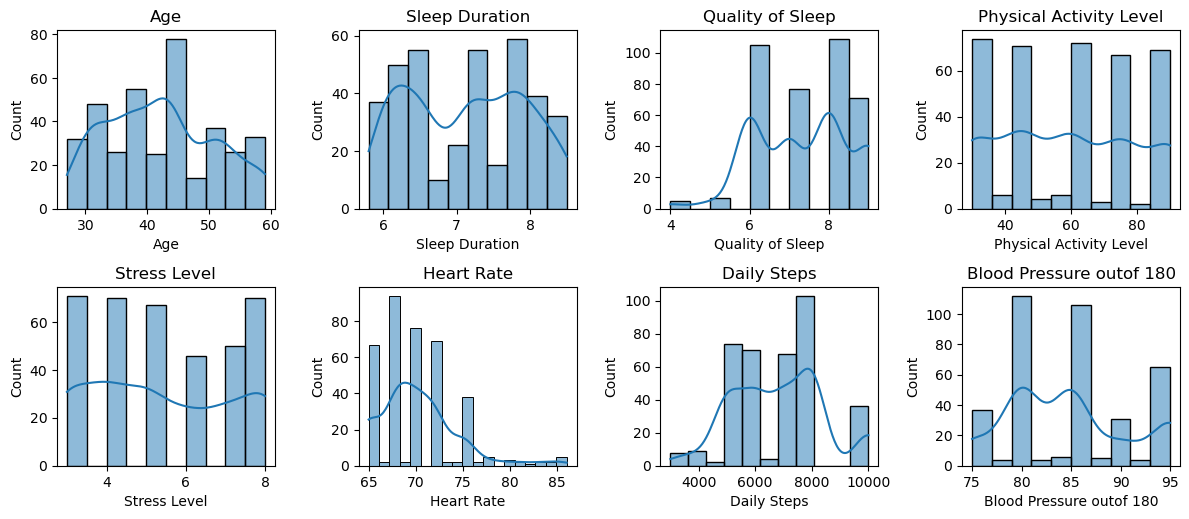

In [26]:
plt.figure(figsize=(12,10))
for i,var in enumerate(df[num_var]):
    plt.subplot(4,4,i+1)
    sns.histplot(df[var],kde=True)
    plt.title(var)
    
plt.tight_layout()
plt.show()

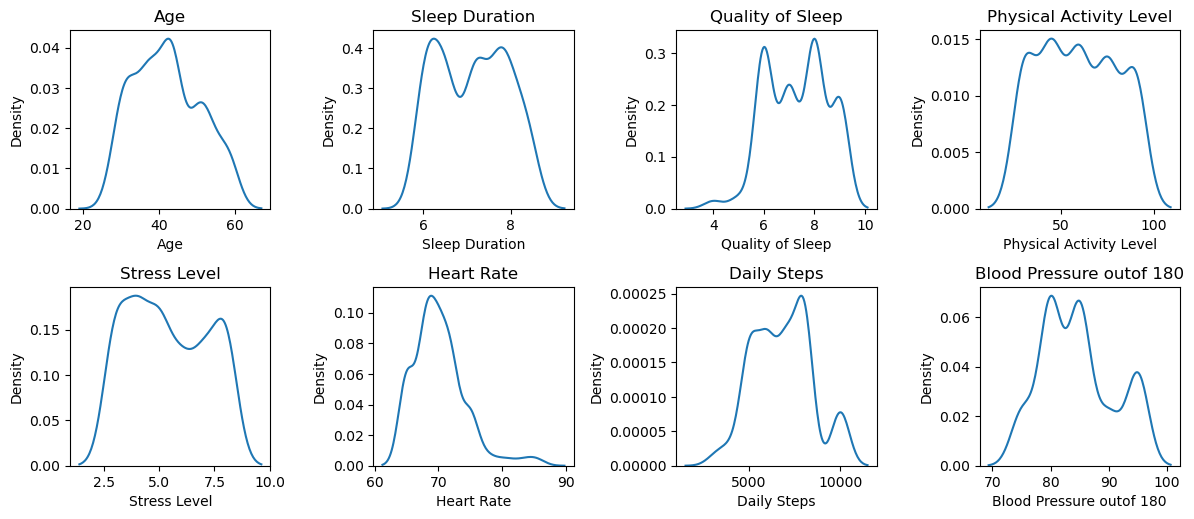

In [27]:
plt.figure(figsize=(12,10))
for i,var in enumerate(df[num_var]):
    plt.subplot(4,4,i+1)
    sns.kdeplot(df[var])
    plt.title(var)
    
plt.tight_layout()
plt.show()

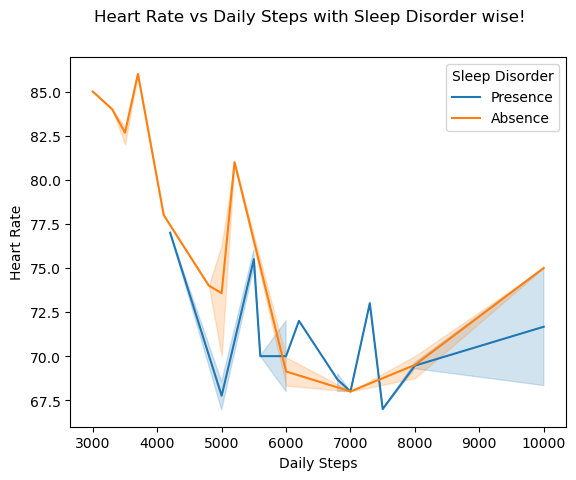

In [28]:
sns.lineplot(y=df['Heart Rate'],x=df['Daily Steps'],hue=df['Sleep Disorder'])
plt.suptitle("Heart Rate vs Daily Steps with Sleep Disorder wise!")
plt.show()

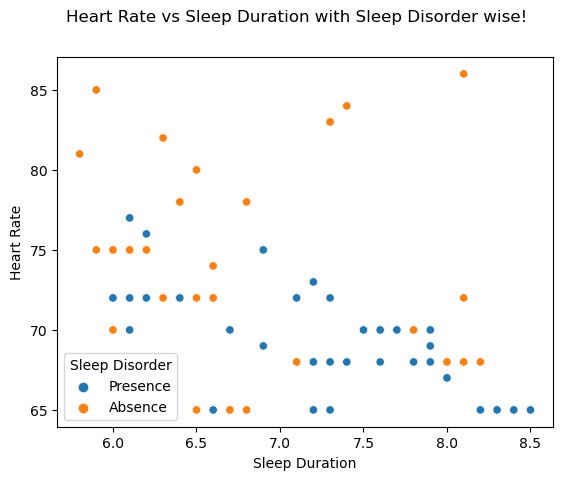

In [29]:
sns.scatterplot(x=df['Sleep Duration'],y=df['Heart Rate'],hue=df['Sleep Disorder'])
plt.suptitle("Heart Rate vs Sleep Duration with Sleep Disorder wise!")
plt.show()

In [30]:
df['Sleep Disorder'].unique()

array(['Presence', 'Absence'], dtype=object)

In [31]:
sd=pd.DataFrame(df['Sleep Disorder'].value_counts())
sd=sd.T

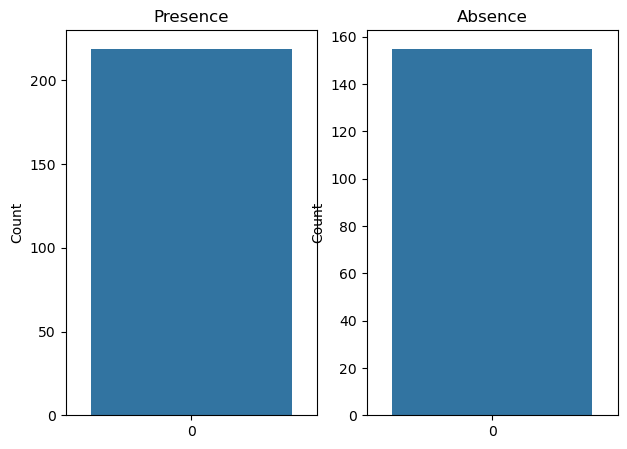

In [32]:
plt.figure(figsize=(11,5))
for i,var in enumerate(sd):
    plt.subplot(1,3,i+1)
    sns.barplot(sd[var])
    plt.ylabel("Count")
    plt.title(var)

In [33]:
df[num_var].skew()

Age                         0.257222
Sleep Duration              0.037554
Quality of Sleep           -0.207448
Physical Activity Level     0.074487
Stress Level                0.154330
Heart Rate                  1.224824
Daily Steps                 0.178277
Blood Pressure outof 180    0.378570
dtype: float64

## **3. Data Splitting and Feature Scaling**

In [34]:
df['Sleep Disorder'].unique()

array(['Presence', 'Absence'], dtype=object)

In [35]:
X=df.drop(columns='Sleep Disorder')
y=df['Sleep Disorder']

In [36]:
##importing the required library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
##evaluations metrics
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay,confusion_matrix
##models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,BaggingClassifier,VotingClassifier,GradientBoostingClassifier

In [37]:
le=LabelEncoder()
y=le.fit_transform(y)

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
X_train.shape,X_test.shape

((299, 11), (75, 11))

In [40]:
##Column Transformer
tf1=ColumnTransformer(transformers=[
    ('ohn',OneHotEncoder(),[0,2,7])
],remainder='passthrough')

tf2=ColumnTransformer(transformers=[
    ('Stscaler',StandardScaler(),slice(0,None))
],remainder='passthrough')

**Logistic Regression**

In [41]:
lr=LogisticRegression()

In [42]:
pipe_lr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('lr',lr)
])

In [43]:
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Stscaler', StandardScaler(),
                                                  slice(0, None, None))])),
                ('lr', LogisticRegression())])

In [44]:
pipe_lr.score(X_train,y_train)

0.9331103678929766

In [45]:
y_pred_lr=pipe_lr.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred_lr)

0.9466666666666667

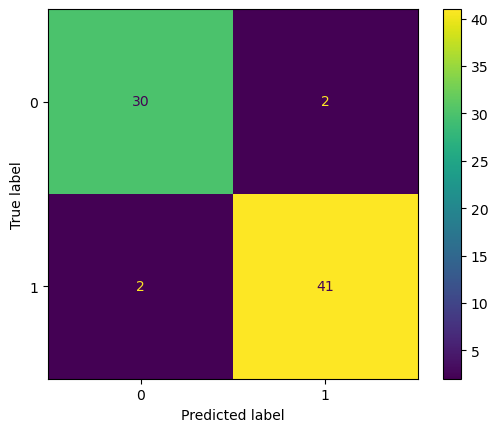

In [47]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lr)).plot()

In [48]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        32
           1       0.95      0.95      0.95        43

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



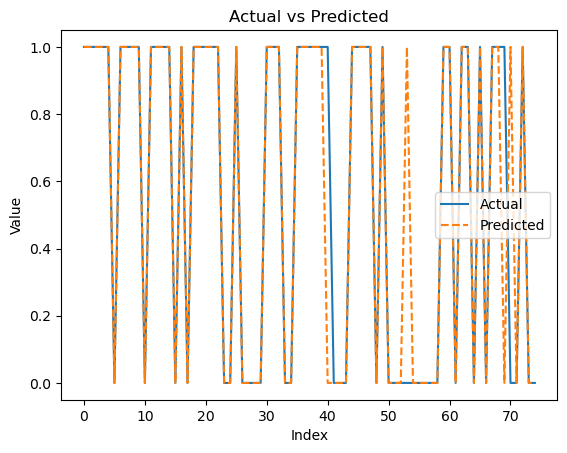

In [49]:
# Plot the line plots
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lr, linestyle='dashed', label='Predicted')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Set legend
plt.legend()

# Show the plot
plt.show()

**KNN Implement**

In [50]:
knn=KNeighborsClassifier()

In [51]:
pipe_knn=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('knn',knn)
])

In [52]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Stscaler', StandardScaler(),
                                                  slice(0, None, None))])),
                ('knn', KNeighborsClassifier())])

In [53]:
pipe_knn.score(X_train,y_train)

0.919732441471572

In [54]:
y_pred_knn=pipe_knn.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.9333333333333333

**Hyper Tuning the parameter**

In [55]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [56]:
# Perform grid search
gs_knn = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)
# grid_search.fit(X_train, y_train)

In [57]:
pipe_gsknn=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('gs_knn',gs_knn)
])

In [58]:
pipe_gsknn.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Stscaler', StandardScaler(),
                                                  slice(0, None, None))])),
                ('gs_knn',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                                          'weights': ['uniform', 'distance']},
                              scoring='accuracy'))])

In [59]:
# Get the best hyperparameters and the corresponding model
best_params = gs_knn.best_params_
best_model = gs_knn.best_estimator_
print("Best Parameters :",best_params)
print("Best Model :",best_model)

Best Parameters : {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Model : KNeighborsClassifier(p=1)


In [60]:
pipe_gsknn.score(X_train, y_train)

0.9230769230769231

In [61]:
y_pred_gsknn=pipe_gsknn.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred_gsknn)

0.9466666666666667

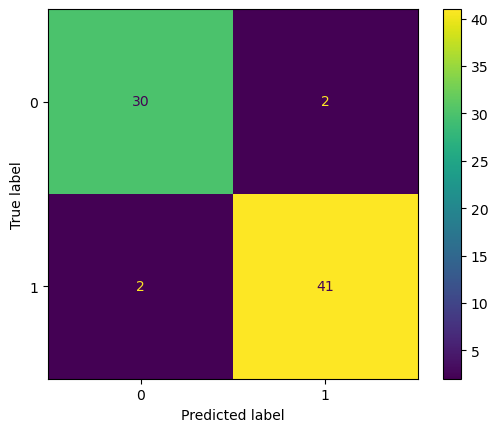

In [63]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_gsknn)).plot()

In [64]:
print(classification_report(y_test,y_pred_gsknn))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        32
           1       0.95      0.95      0.95        43

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



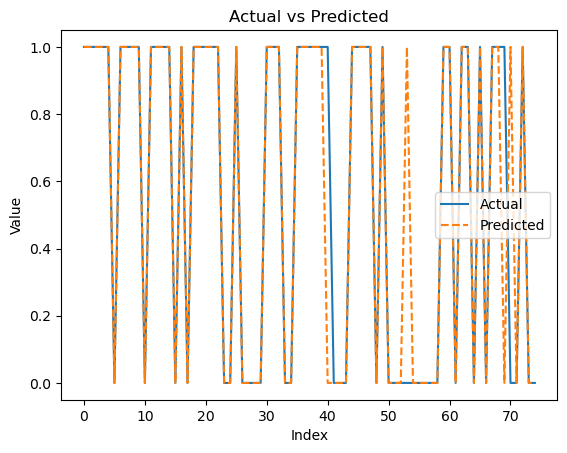

In [65]:
# Plot the line plots
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gsknn, linestyle='dashed', label='Predicted')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Set legend
plt.legend()

# Show the plot
plt.show()

**SVM Classifier**

In [66]:
svc=SVC()

In [67]:
pipe_svc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('svc',svc)
])

In [68]:
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Stscaler', StandardScaler(),
                                                  slice(0, None, None))])),
                ('svc', SVC())])

In [69]:
pipe_svc.score(X_train,y_train)

0.9331103678929766

In [70]:
y_pred_svc=pipe_svc.predict(X_test)

In [71]:
accuracy_score(y_test,y_pred_svc)

0.9466666666666667

**Hyper Tuning the Model**

In [72]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}


In [73]:
# Perform grid search
gs_svc = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)
pipe_gssvc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('gssvc',gs_svc)
])

In [74]:
pipe_gssvc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Stscaler', StandardScaler(),
                                                  slice(0, None, None))])),
                ('gssvc',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid={'C': [0.1, 1, 10],
                                          'degree': [2, 3, 4],
                                          'gamma': ['scale', 'auto'],
                                          'kernel': ['linear', 'rbf']},
                              scoring='accuracy'))])

In [75]:
gs_svc.best_params_

{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [76]:
gs_svc.best_score_

0.9196045197740114

In [77]:
svc=SVC(C=10, degree=2, gamma='scale', kernel='rbf')

In [78]:
pipe_svc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('svc',svc)
])

In [79]:
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Stscaler', StandardScaler(),
                                                  slice(0, None, None))])),
                ('svc', SVC(C=10, degree=2))])

**Score on training dataset**

In [80]:
pipe_svc.score(X_train,y_train)

0.939799331103679

In [81]:
y_pred_svct=pipe_svc.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred_svct)

0.96

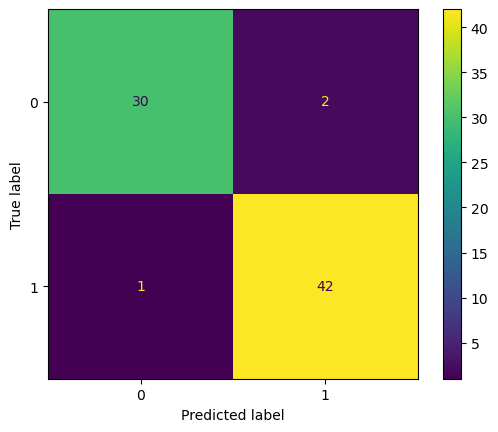

In [83]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_svct)).plot()

In [84]:
print(classification_report(y_test,y_pred_svct))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.95      0.98      0.97        43

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



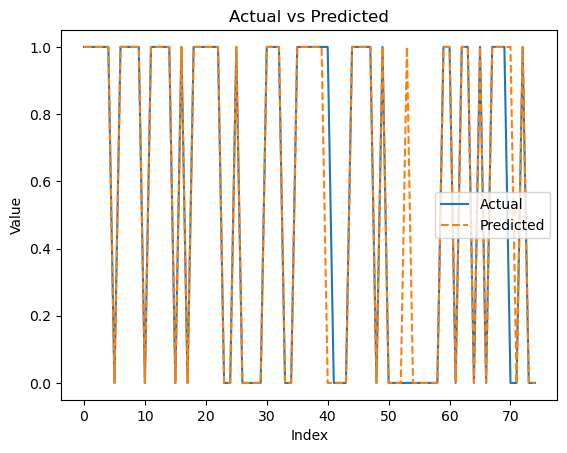

In [85]:
# Plot the line plots
plt.plot(y_test, label='Actual')
plt.plot(y_pred_svct, linestyle='dashed', label='Predicted')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Set legend
plt.legend()

# Show the plot
plt.show()

**Decision Tree Classifier**

In [86]:
dtc=DecisionTreeClassifier()

In [87]:
pipe_dtc=Pipeline([
    ('tf1',tf1),
    ('dtc',dtc)
])

In [88]:
pipe_dtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('dtc', DecisionTreeClassifier())])

**Score on training dataset**

In [89]:
pipe_dtc.score(X_train,y_train)

0.939799331103679

In [90]:
y_pred_dtc=pipe_dtc.predict(X_test)

In [91]:
accuracy_score(y_test,y_pred_dtc)

0.96

**Tuning the hyper parameters**

In [92]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'log2']
}

In [93]:
# Perform grid search
gs_dtc = GridSearchCV(dtc, param_grid, scoring='accuracy', cv=5)
pipe_gsdtc=Pipeline([
    ('tf1',tf1),
    ('gs_dtc',gs_dtc)
])

In [94]:
pipe_gsdtc.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/opt/conda/lib/pytho

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('gs_dtc',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [None, 5, 10, 20],
                                          'max_features': ['auto', 'log2'],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10]},
                              scoring='accuracy'))])

In [95]:
pipe_gsdtc.score(X_train,y_train)

0.939799331103679

In [96]:
y_pred_gsdtc=pipe_gsdtc.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred_gsdtc)

0.96

In [98]:
gs_dtc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [99]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='auto',min_samples_leaf=2,min_samples_split=2)

In [100]:
pipe_dtc=Pipeline([
    ('tf1',tf1),
    ('dtc',dtc)
])

In [101]:
pipe_dtc.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('dtc',
                 DecisionTreeClassifier(max_depth=5, max_features='auto',
                                        min_samples_leaf=2))])

In [102]:
pipe_dtc.score(X_train,y_train)

0.939799331103679

In [103]:
y_pred_dtct=pipe_dtc.predict(X_test)

In [104]:
accuracy_score(y_test,y_pred_dtct)

0.96

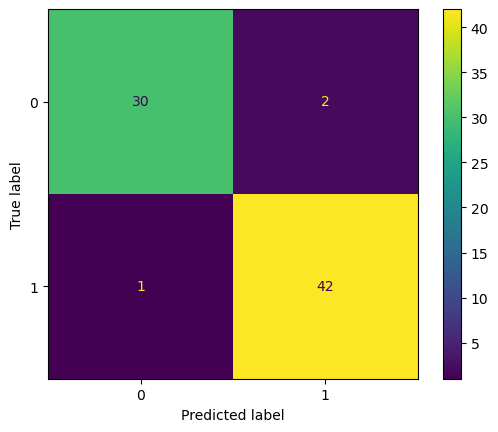

In [105]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_gsdtc)).plot()

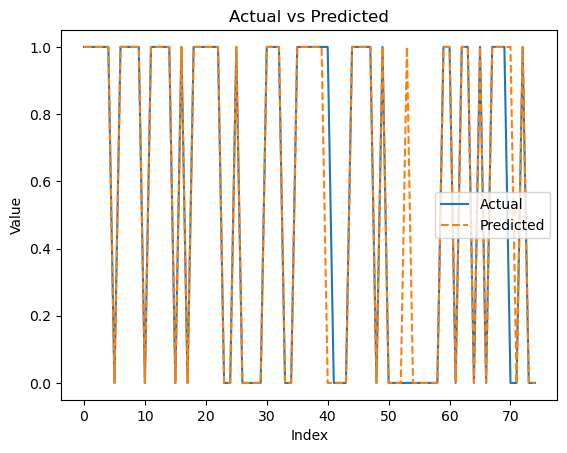

In [106]:
# Plot the line plots
plt.plot(y_test, label='Actual')
plt.plot(y_pred_dtc, linestyle='dashed', label='Predicted')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Set legend
plt.legend()

# Show the plot
plt.show()

In [107]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.95      0.98      0.97        43

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



**Random Forest Classifier**

In [108]:
rfc=RandomForestClassifier()

In [109]:
pipe_rfc=Pipeline([
    ('tf1',tf1),
    ('rfc',rfc),
])

In [110]:
pipe_rfc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('rfc', RandomForestClassifier())])

In [111]:
pipe_rfc.score(X_train,y_train)

0.939799331103679

In [112]:
y_pred_rfc=pipe_rfc.predict(X_test)

In [113]:
accuracy_score(y_test,y_pred_rfc)

0.96

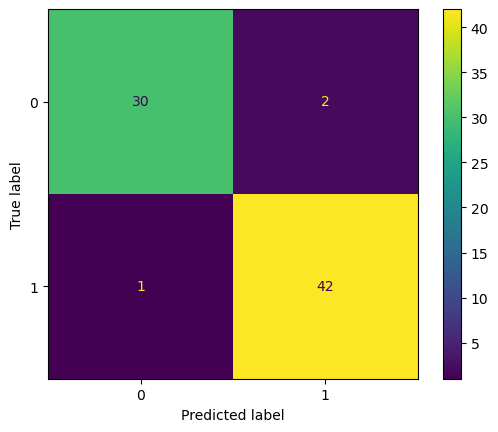

In [114]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rfc)).plot()

In [115]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.95      0.98      0.97        43

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



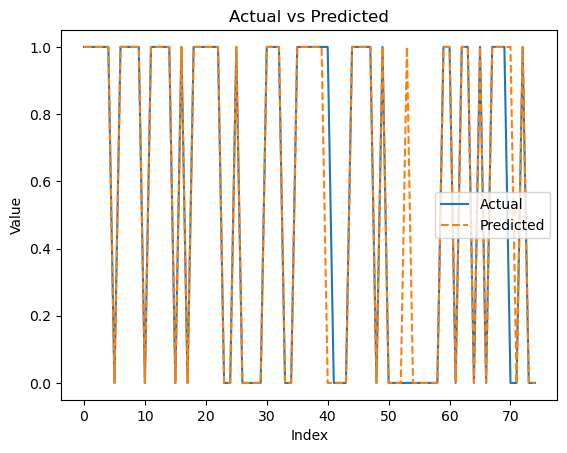

In [116]:
# Plot the line plots
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rfc, linestyle='dashed', label='Predicted')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Set legend
plt.legend()

# Show the plot
plt.show()

**Bagging Classifier**

In [117]:
bgg=BaggingClassifier(estimator=dtc)

In [118]:
pipe_bgg=Pipeline([
    ('tf1',tf1),
    ('bgg',bgg)
])

In [119]:
pipe_bgg.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('bgg',
                 BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                    max_features='auto',
                                                                    min_samples_leaf=2)))])

In [120]:
pipe_bgg.score(X_train,y_train)

0.939799331103679

In [121]:
y_pred_bgg=pipe_bgg.predict(X_test)

In [122]:
accuracy_score(y_test,y_pred_bgg)

0.96

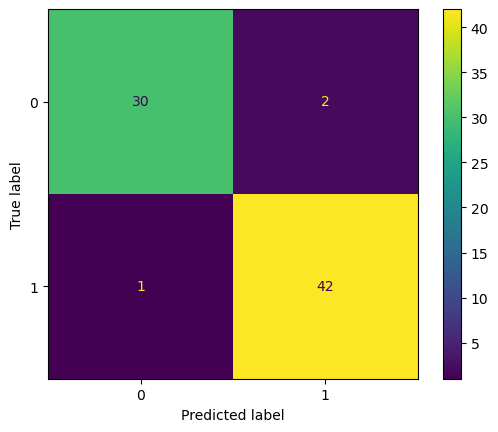

In [123]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_bgg)).plot()

In [124]:
print(classification_report(y_test,y_pred_bgg))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.95      0.98      0.97        43

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



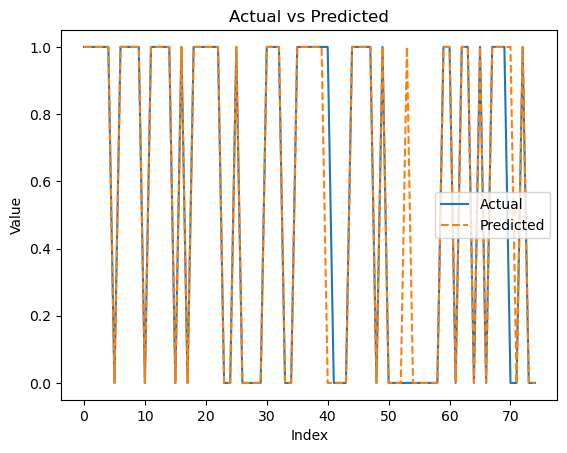

In [125]:
# Plot the line plots
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bgg, linestyle='dashed', label='Predicted')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Set legend
plt.legend()

# Show the plot
plt.show()

**Votting Classifier**

In [126]:
# Create the Voting Classifier
vc = VotingClassifier(
    estimators=[('xgb', rfc), ('decision_tree', dtc), ('rfc',rfc)],
    voting='hard'  # Change to 'soft' for soft voting
)


In [127]:
pipe_vc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('vc',vc)
])

In [128]:
pipe_vc.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Stscaler', StandardScaler(),
                                                  slice(0, None, None))])),
                ('vc',
                 VotingClassifier(estimators=[('xgb', RandomForestClassifier()),
                                              ('decision_tree',
                                               DecisionTreeClassifier(max_depth=5,
                                                                      max_features='auto',
                                                                      min_samples_leaf=2)),
                                              ('rfc',
                                               RandomForestClassifier())]))])

**Score on training dataset**

In [129]:
pipe_vc.score(X_train,y_train)

0.939799331103679

In [130]:
y_pred_vc=pipe_vc.predict(X_test)

In [131]:
accuracy_score(y_test,y_pred_vc)

0.96

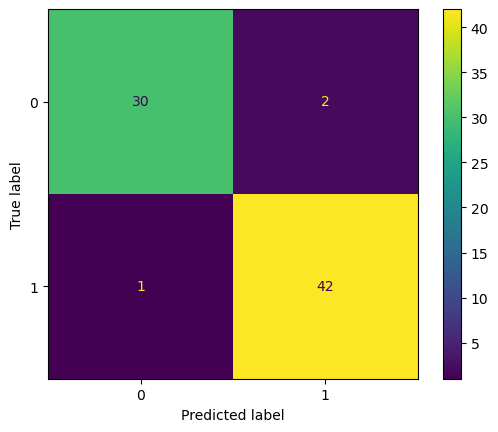

In [132]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_vc)).plot()

In [133]:
print(classification_report(y_test,y_pred_vc))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.95      0.98      0.97        43

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



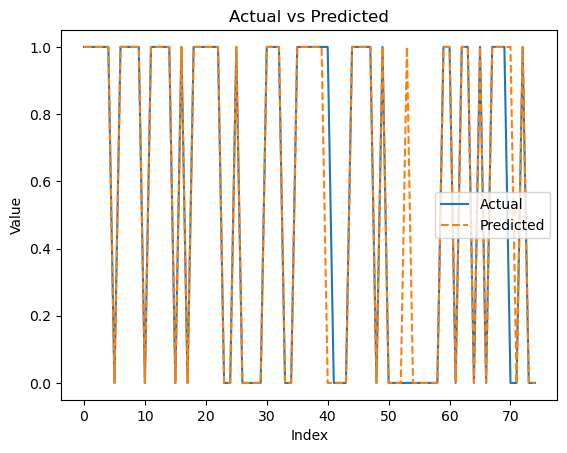

In [134]:
# Plot the line plots
plt.plot(y_test, label='Actual')
plt.plot(y_pred_vc, linestyle='dashed', label='Predicted')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Set legend
plt.legend()

# Show the plot
plt.show()

**Gradient Boosting Classifier**

In [135]:
gbc=GradientBoostingClassifier()

In [136]:
pipe_gbc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('gbc',gbc)
])

In [137]:
pipe_gbc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Stscaler', StandardScaler(),
                                                  slice(0, None, None))])),
                ('gbc', GradientBoostingClassifier())])

In [138]:
pipe_gbc.score(X_train,y_train)

0.939799331103679

In [139]:
y_pred_gbc=pipe_gbc.predict(X_test)

In [140]:
accuracy_score(y_test,y_pred_gbc)

0.96

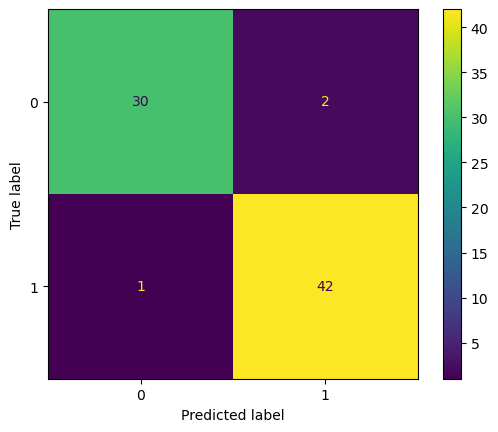

In [141]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_gbc)).plot()

In [142]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.95      0.98      0.97        43

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



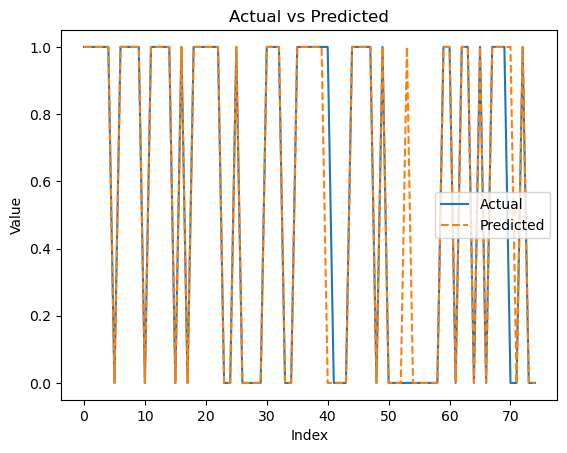

In [143]:
# Plot the line plots
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gbc, linestyle='dashed', label='Predicted')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Set legend
plt.legend()

# Show the plot
plt.show()

**AdaBoosting Classifier**

In [144]:
adac=AdaBoostClassifier()

In [145]:
pipe_ada=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('adac',adac)
])

In [146]:
pipe_ada.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Stscaler', StandardScaler(),
                                                  slice(0, None, None))])),
                ('adac', AdaBoostClassifier())])

In [147]:
pipe_ada.score(X_train,y_train)

0.9364548494983278

In [148]:
y_pred_ada=pipe_ada.predict(X_test)

In [149]:
accuracy_score(y_test,y_pred_ada)

0.9466666666666667

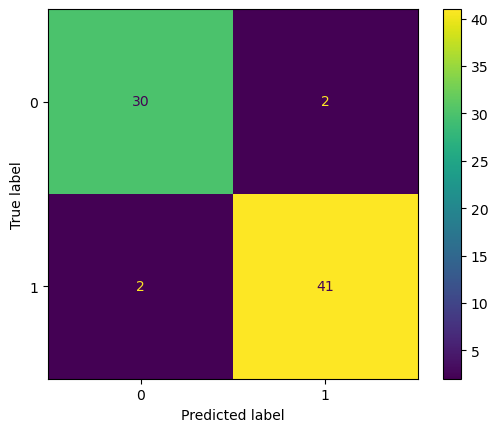

In [150]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ada)).plot()

In [151]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        32
           1       0.95      0.95      0.95        43

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [152]:
import xgboost as xgb

In [153]:
xgbc=xgb.XGBClassifier()

In [154]:
pipe_xgbc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('xgbc',xgbc)
])

In [155]:
pipe_xgbc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohn', OneHotEncoder(),
                                                  [0, 2, 7])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Stscaler', StandardScaler(),
                                                  slice(0, None, None))])),
                ('xgbc',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [156]:
pipe_xgbc.score(X_train,y_train)

0.939799331103679

In [157]:
y_pred_xgbc=pipe_xgbc.predict(X_test)

In [158]:
accuracy_score(y_test,y_pred_xgbc)

0.96

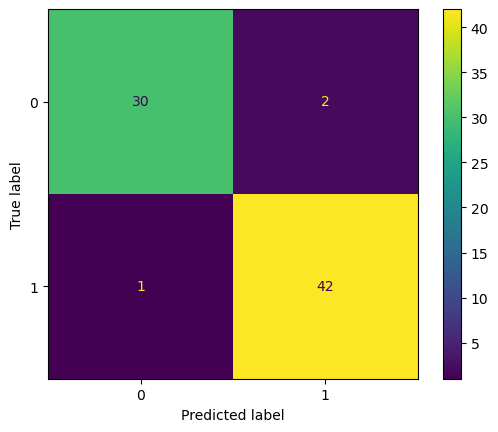

In [159]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_xgbc)).plot()

In [160]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.95      0.98      0.97        43

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



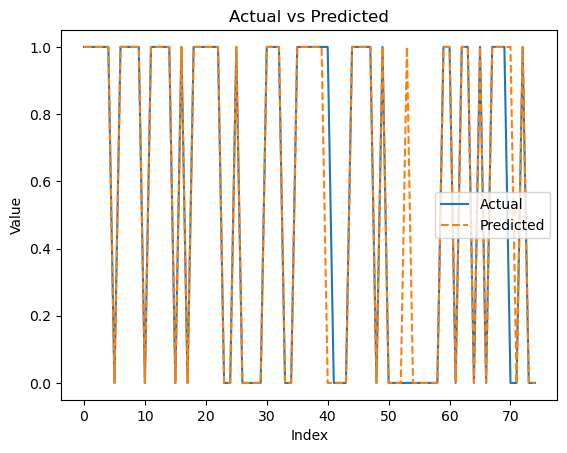

In [161]:
# Plot the line plots
plt.plot(y_test, label='Actual')
plt.plot(y_pred_xgbc, linestyle='dashed', label='Predicted')

# Set labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Set legend
plt.legend()

# Show the plot
plt.show()

In [162]:
d={
    'Model Name':['Logistic Regression','K Nearest Neighbor','Support Vector Machine','Decision Tree Classifier','Random Foreest Classifier','AdaBoosting Classifier','GradientBoosting Classifier','Bagging Classifier','XGBoosting Clsssifier'],
    'Score':[accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_gsknn),accuracy_score(y_test,y_pred_svct),accuracy_score(y_test,y_pred_dtct),accuracy_score(y_test,y_pred_rfc),accuracy_score(y_test,y_pred_ada),accuracy_score(y_test,y_pred_gbc),accuracy_score(y_test,y_pred_bgg),accuracy_score(y_test,y_pred_xgbc)]
}

In [163]:
pd.DataFrame(d).sort_values(by='Score',ascending=False)

,Model Name,Score
2,Support Vector Machine,0.960000
3,Decision Tree Classifier,0.960000
4,Random Foreest Classifier,0.960000
6,GradientBoosting Classifier,0.960000
7,Bagging Classifier,0.960000
8,XGBoosting Clsssifier,0.960000
0,Logistic Regression,0.946667
1,K Nearest Neighbor,0.946667
5,AdaBoosting Classifier,0.946667


## **Test on random Sample data points**

In [164]:
df.sample(3)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Blood Pressure outof 180
368,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Absence,95.0
163,Male,40,Lawyer,7.9,8,90,5,Normal,68,8000,Presence,85.0
285,Female,50,Nurse,6.0,6,90,8,Overweight,75,10000,Absence,95.0


In [165]:
df['Sleep Disorder'].unique()

array(['Presence', 'Absence'], dtype=object)

In [166]:
pipe_xgbc.predict(pd.DataFrame([['Female',54,'Engineer',8.4,9,30,3,'Normal',65,5000,80.0]],columns=['Gender','Age','Occupation','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','BMI Category','Heart Rate','Daily Steps','Blood Pressure outof 180']))

array([1])

In [167]:
pipe_xgbc.predict(pd.DataFrame([['Male',35,'Engineer',7.3,8,60,4,'Normal',65,5000,80.0]],columns=['Gender','Age','Occupation','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','BMI Category','Heart Rate','Daily Steps','Blood Pressure outof 180']))

array([1])

In [168]:
pipe_xgbc.predict(pd.DataFrame([['Male',44,'Salesperson',6.3,6,45,7,'Overweight',72,6000,85.0]],columns=['Gender','Age','Occupation','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','BMI Category','Heart Rate','Daily Steps','Blood Pressure outof 180']))

array([0])

In [169]:
pipe_xgbc.predict(pd.DataFrame([['Female',36,'Teacher',7.2,8,60,4,'Normal',68,7000,75.0]],columns=['Gender','Age','Occupation','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','BMI Category','Heart Rate','Daily Steps','Blood Pressure outof 180']))

array([1])

In [170]:
pipe_rfc.predict(pd.DataFrame([['Female',49,'Nurse',6.2,6,90,8,'Overweight',75,10000,95.0]],columns=['Gender','Age','Occupation','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','BMI Category','Heart Rate','Daily Steps','Blood Pressure outof 180']))

array([0])